In [2]:
import pandas as pd

xlsx = pd.ExcelFile('Assignment for One health.xlsx')
df = pd.read_excel(xlsx, 'data')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06 00:00:00,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
mean_income = df['Income'].mean(skipna=True)
median_income = df['Income'].median(skipna=True)
mode_income = df['Income'].mode(dropna=True)
mean_income, median_income, mode_income

(52247.25135379061,
 51381.5,
 0    7500.0
 Name: Income, dtype: float64)

In [4]:

df['Income'] = df['Income'].astype(str)
df['Income'] = df['Income'].str.replace('[,\$\s]', '', regex=True)
df['Income'] = pd.to_numeric(df['Income'], errors='coerce', downcast='float')
df['Income'] = df['Income'].fillna(mean_income).astype(int)
# df['Income'] = round(df['Income'], 2)
df['Income']


0       58138
1       46344
2       71613
3       26646
4       58293
        ...  
2235    61223
2236    64014
2237    56981
2238    69245
2239    52869
Name: Income, Length: 2240, dtype: int64

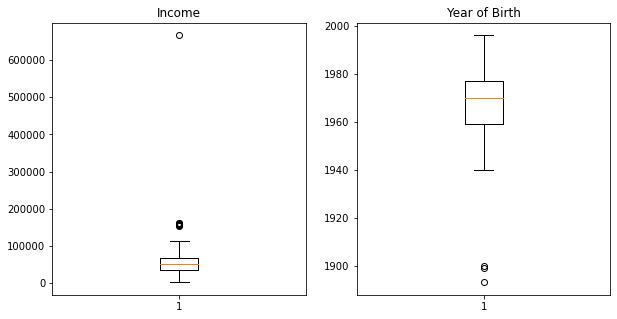

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].boxplot(df['Income'])
axs[0].set_title('Income')

axs[1].boxplot(df['Year_Birth'])
axs[1].set_title('Year of Birth')

plt.show()

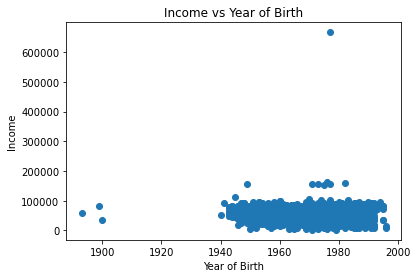

In [28]:
plt.scatter(df['Year_Birth'], df['Income'])
plt.title('Income vs Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Income')
plt.show()

In [5]:
df['Dt_Customer']

0       2012-04-09 00:00:00
1       2014-08-03 00:00:00
2                21-08-2013
3       2014-10-02 00:00:00
4                19-01-2014
               ...         
2235             13-06-2013
2236    2014-10-06 00:00:00
2237             25-01-2014
2238             24-01-2014
2239             15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [11]:
df['Dt_Customer'].dtypes

dtype('O')

In [7]:
df['Dt_Customer'][0]

datetime.datetime(2012, 4, 9, 0, 0)

In [12]:
data_types = set(df['Dt_Customer'].apply(type))
data_types

{datetime.datetime, str}

In [8]:
df['Dt_Customer'][2]

'21-08-2013'

In [ ]:
import datetime

for i in range(len(df['Dt_Customer'])):
    if isinstance(df['Dt_Customer'][i], datetime.datetime):
        print("The cell contains a datetime object")
    else:
        print("The cell does not contain a datetime object")

In [14]:
marital_status_types = df['Marital_Status'].unique()
marital_status_types

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [15]:
education_levels = df['Education'].unique()
education_levels

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

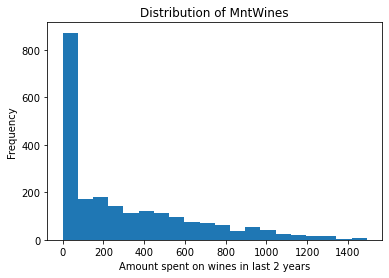

In [16]:
import matplotlib.pyplot as plt

plt.hist(df['MntWines'], bins=20)
plt.title('Distribution of MntWines')
plt.xlabel('Amount spent on wines in last 2 years')
plt.ylabel('Frequency')
plt.show()

In [17]:
df["MntWines"].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

In [18]:
df['Complain'].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [19]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [21]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64